In [32]:
%cd ..

/hdd/aouadt/these/projets


In [33]:
from importlib import reload
import random

import numpy as np
import matplotlib.pyplot as plt
import torch
import skimage.morphology as morp

import deep_morpho.tensor_with_attributes as twa
import deep_morpho.morp_operations as morpop
import deep_morpho.gray_scale as gs
import deep_morpho.datasets.collate_fn_gray as cfg
import deep_morpho.datasets.mnist_dataset as mnist

def reload_modules():
    for modl in [
        twa, morpop, gs, cfg, mnist
    ]:
        reload(modl)

reload_modules()

# Sandbox

In [31]:
x = torch.ones((5, 5))
x.metadata = {1: "1"}
print(x.metadata)

x = x.to('cuda')
print(x.metadata)

{1: '1'}


AttributeError: 'Tensor' object has no attribute 'metadata'

In [10]:
x.size()[:1]

torch.Size([5])

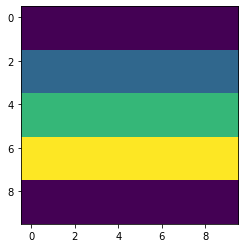

In [49]:
img = np.zeros((10, 10))
img[2:4] = 1
img[4:6] = 2
img[6:8] = 3

plt.imshow(img)

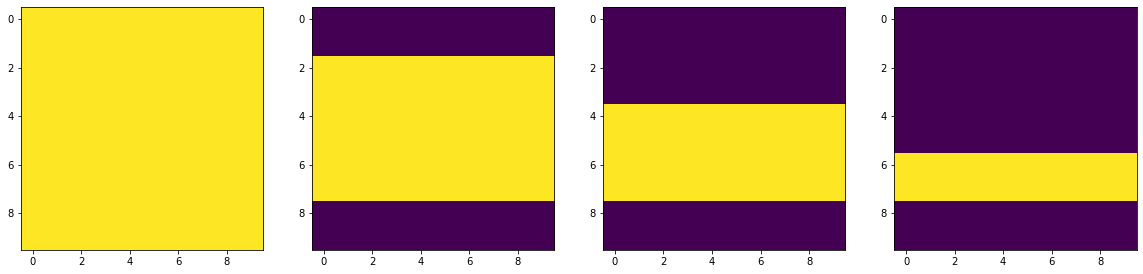

In [59]:
reload_modules()
ls, values = gs.level_sets_from_gray(img)

plt.figure(figsize=(20, 5))
for idx in range(ls.shape[0]):
    plt.subplot(1, 4, idx + 1)
    plt.imshow(ls[idx], vmin=0, vmax=1)

In [58]:
values.cumsum() - values

array([0., 0., 1., 3.])

In [55]:
values

array([0., 1., 2., 3.])

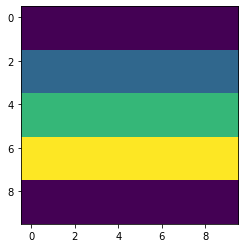

In [63]:
reload_modules()
img2 = gs.gray_from_level_sets(ls, values)
plt.imshow(img2)

In [33]:
img = np.random.randint(0, 4, (10, 10))
img2 = gs.gray_from_level_sets(*gs.level_sets_from_gray(img))

In [47]:
ls, values = gs.level_sets_from_gray(img)

In [66]:
img = np.random.randint(0, 10, (20, 20))
selem = morp.disk(1)
ls, values = gs.level_sets_from_gray(img)

for idx in range(ls.shape[0]):
    ls[idx] = morp.dilation(ls[idx], selem)

dil1 = gs.gray_from_level_sets(ls, values)
dil2 = morp.dilation(img, selem)

assert np.sum(np.abs(dil1 - dil2)) == 0

# Mnist Dataset

In [84]:
reload_modules()
dataset = mnist.MnistGrayScaleDataset(
    morpop.ParallelMorpOperations.dilation_gray(
        ("disk", 1), 
    ),
    n_gray_scale_values=10,
)

loader = mnist.MnistGrayScaleDataset.get_loader(batch_size=10, n_inputs=100, morp_operation=morpop.ParallelMorpOperations.dilation_gray(
        ("disk", 3), 
    ), n_gray_scale_values=10, train=True)


In [85]:
img, tar = next(iter(loader))

In [86]:
img, pred, target, original_img, original_target = mnist.MnistGrayScaleDataset.get_relevent_tensors_idx(0, (img, tar), tar)

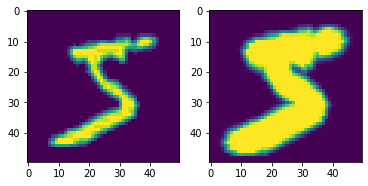

In [88]:
plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(original_target)

In [49]:
torch.zeros(size=(3, 3))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [56]:
twa.TensorGray(device='cuda')

RuntimeError: legacy constructor expects device type: cpu but device type: cuda was passed

In [41]:
isinstance(img.gray_values, twa.TensorGray)

True

In [20]:
for batch_idx, batch in enumerate(loader):
    print(batch[0].gray_values)
    assert False

tensor([  0.,  23.,  48.,  75., 103., 136., 171., 204., 231., 255.,   0.,  24.,
         49.,  82., 111., 142., 174., 206., 231., 255.,   0.,  19.,  46.,  76.,
        107., 144., 178., 207., 233., 255.,   0.,  24.,  48.,  81., 111., 150.,
        180., 208., 234., 255.,   0.,  26.,  49.,  81., 112., 143., 173., 206.,
        231., 255.,   0.,  24.,  44.,  73., 111., 145., 177., 203., 232., 255.,
          0.,  22.,  48.,  76., 112., 143., 173., 207., 230., 255.,   0.,  22.,
         49.,  73., 106., 136., 170., 206., 231., 255.,   0.,  24.,  51.,  80.,
        105., 140., 176., 203., 231., 255.,   0.,  24.,  53.,  80., 112., 144.,
        176., 204., 233., 255.])


AssertionError: 

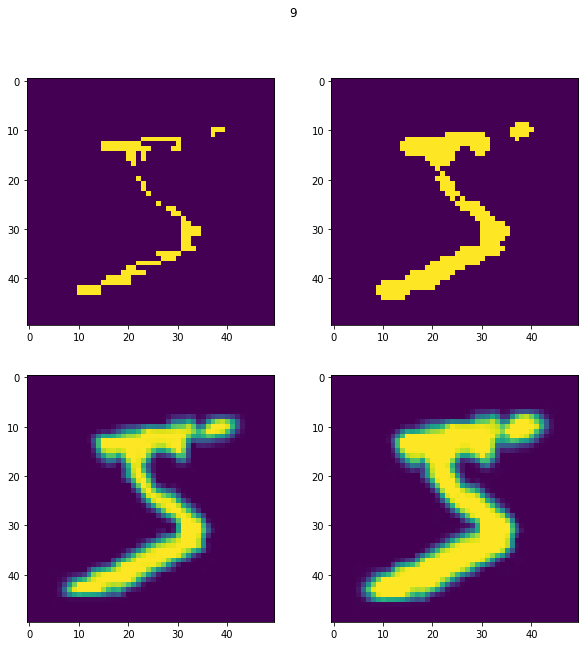

In [138]:
# idx = 1
idx = random.choice(range(len(img)))

plt.figure(figsize=(10, 10))
plt.suptitle(idx)

plt.subplot(221)
plt.imshow(img[idx, 0], vmin=0, vmax=1)

plt.subplot(222)
plt.imshow(tar[idx, 0], vmin=0, vmax=1)

plt.subplot(223)
plt.imshow(img1)

plt.subplot(224)
plt.imshow(tar1)



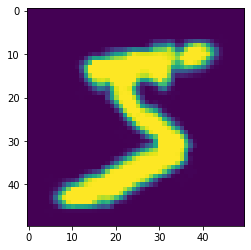

In [91]:
plt.imshow(dataset.morp_operation.operations[0][0][0](img1[..., 0]))

In [75]:
tar1.unique()

tensor([0., 1.])